# How much does activity level effect sleep time?


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
daily_activity = pd.read_csv("Fitness  Data\dailyActivity_merged.csv")
sleep_activity_daily = pd.read_csv("Fitness  Data\sleepDay_merged.csv")
weight_log = pd.read_csv("Fitness  Data\weightLogInfo_merged.csv")
heart_rate = pd.read_csv("Fitness  Data\heartrate_seconds_merged.csv")

In [3]:
daily_activity.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
daily_activity.ActivityDate.dtype

dtype('O')

In [6]:
daily_activity.index = pd.to_datetime(daily_activity['ActivityDate'])

In [7]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
ActivityDate,,,,,,,,,,,,,,,
2016-04-12,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
2016-04-13,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2016-04-14,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
2016-04-15,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
2016-04-16,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

In [9]:
daily_activity.rename(columns={'ActivityDate':'Date'},inplace=True)

In [10]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2016-04-12 to 2016-05-12
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  Lig

In [11]:
sleep_activity_daily.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [12]:
sleep_activity_daily.index = pd.to_datetime(sleep_activity_daily['SleepDay'])
sleep_activity_daily['SleepDay'] = pd.to_datetime(sleep_activity_daily['SleepDay'])

In [13]:
sleep_activity_daily.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
SleepDay,,,,,
2016-04-12,1503960366,2016-04-12,1,327,346
2016-04-13,1503960366,2016-04-13,2,384,407
2016-04-15,1503960366,2016-04-15,1,412,442
2016-04-16,1503960366,2016-04-16,2,340,367
2016-04-17,1503960366,2016-04-17,1,700,712


In [14]:
sleep_activity_daily.rename(columns={'SleepDay':'Date'},inplace=True)

In [15]:
sleep_activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 2016-04-12 to 2016-05-04
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   Date                413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.4 KB


In [16]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [17]:
weight_log.index = pd.to_datetime(weight_log['Date']).dt.date
weight_log['Date'] =  pd.to_datetime(weight_log['Date']).dt.date

In [18]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Date,,,,,,,,
2016-05-02,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000
2016-05-03,1503960366,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1462319999000
2016-04-13,1927972279,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1460509732000
2016-04-21,2873212765,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1461283199000
2016-05-12,2873212765,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [19]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2016-05-02 to 2016-05-12
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 4.3+ KB


In [20]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [21]:
heart_rate.rename(columns={'Time':'Date'},inplace=True)

In [22]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Date    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [23]:
dataframes = [
daily_activity, 
sleep_activity_daily, 
weight_log,
heart_rate
]
num_of_ids = []

for i in dataframes:
    num_of_ids.append(len(i['Id'].unique()))
print(num_of_ids)    

[33, 24, 8, 14]


In [24]:
print(daily_activity['Id'].dtype)
print(daily_activity['Date'].dtype)

int64
datetime64[ns]


In [25]:
print(sleep_activity_daily['Id'].dtype)
print(sleep_activity_daily['Date'].dtype)

int64
datetime64[ns]


In [26]:
daily_activity_and_sleep = pd.merge(daily_activity,sleep_activity_daily, on=['Id','Date'])

In [28]:
daily_activity_and_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   Date                      413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [32]:
users_mean_metrics = daily_activity_and_sleep.groupby("Id")

In [27]:
daily_activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [39]:
heatmap_features = ['TotalDistance','TotalSteps','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalSleepRecords','TotalMinutesAsleep']

In [50]:
new_features = ['TotalSteps','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','TotalMinutesAsleep']

<Axes: >

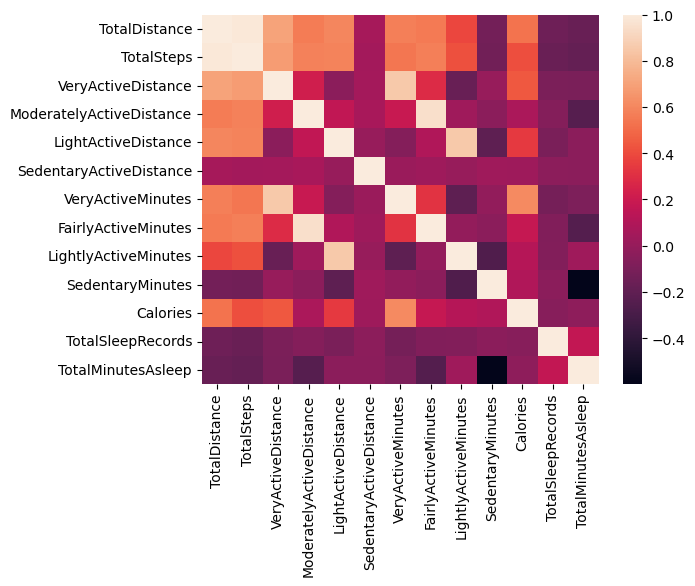

In [51]:
sns.heatmap(daily_activity_and_sleep[heatmap_features].corr())

<Axes: >

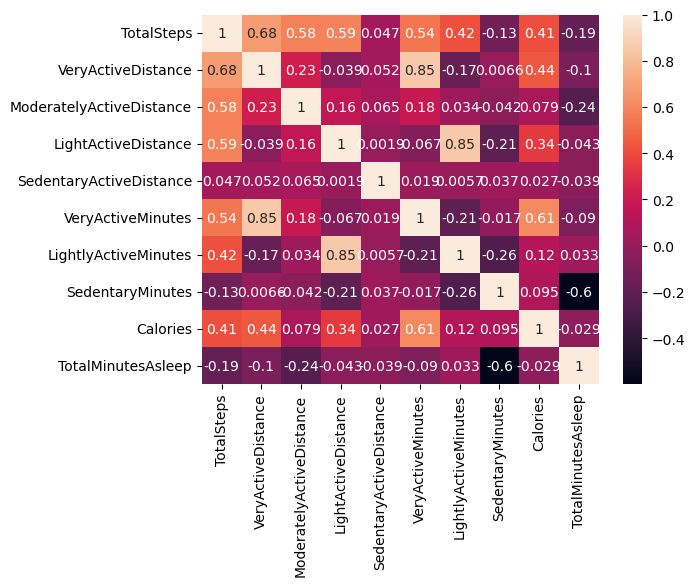

In [58]:
sns.heatmap(daily_activity_and_sleep[new_features].corr(),annot=True)

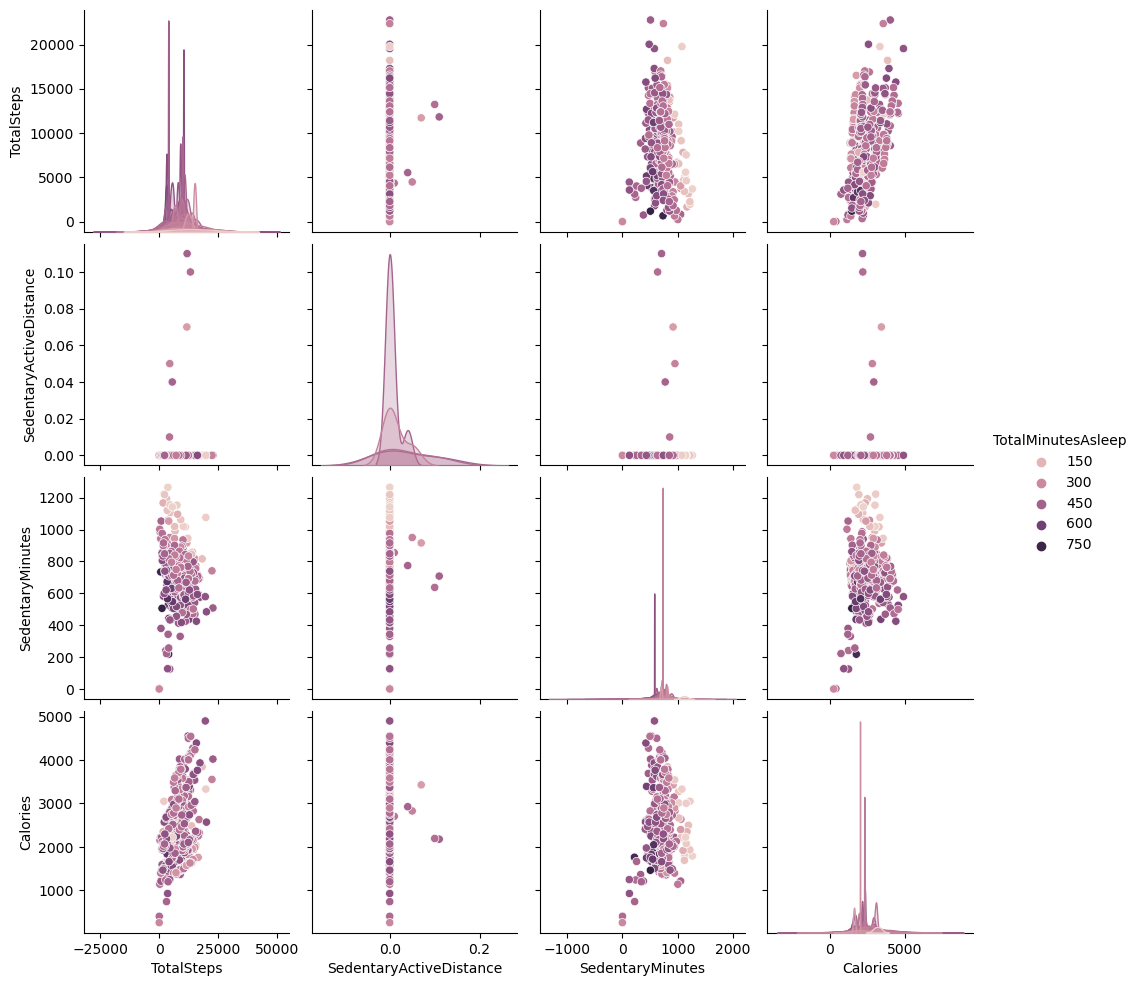

In [57]:
sns.pairplot(daily_activity_and_sleep[['TotalSteps','SedentaryActiveDistance','SedentaryMinutes','Calories','TotalMinutesAsleep']],hue='TotalMinutesAsleep')
